# Image classification pipeline

This is an example of image classification, following the [60 min blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) Pytorch tutorial.

### 1. Get some data

We first gather some data from the `CIFAR10` dataset. This requires `torchvision`.

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms


# Get some training data

transform = transforms.Compose(
        [
                transforms.ToTensor(),
                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
                ]
        )

train = torchvision.datasets.CIFAR10(root = './data',
                                     train = True,
                                     download = True,
                                     transform = transform
                                     )

trainloader = torch.utils.data.DataLoader(train, batch_size=4, 
                                          shuffle=True, num_workers=0
                                          )

test = torchvision.datasets.CIFAR10(root="./data", train=False,
                                    download=True, transform=transform
                                    )

testloader = torch.utils.data.DataLoader(test, batch_size=4, 
                                         shuffle=False, num_workers=0)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


Let's take a look at what's inside:

 frog horse horse   cat


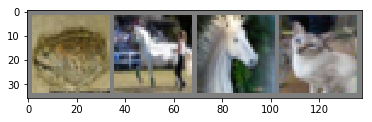

In [10]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def imshow(img):
    img = img/2+0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))


dataiter = iter(trainloader)
images, labels = dataiter.next()


imshow(torchvision.utils.make_grid(images))
print(' '.join("%5s" % classes[labels[j]] for j in range(4)))



In [11]:
### 2. Define the network structure

In [12]:
## Definition of the several layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        '''
        1 input image channel
        6 output channels
        5x5 square convolution kernel
        '''
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        
        # an affine operation: y=Wx+b
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    
    def forward(self, x):
        # Max pooling over a (2,2) window
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()



### 3. Specify success criteria for the network

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4. Main training loop

In [ ]:
# Training loop    
num_epochs = 2
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        # get everything        
        inputs, labels = data
        
        # initialize grads to zero
        optimizer.zero_grad()
        
        # forward, backward, optimize
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        # stats
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
print('Finished training')


[1,  2000] loss: 2.155
[1,  4000] loss: 1.796
[1,  6000] loss: 1.654
[1,  8000] loss: 1.560
[1, 10000] loss: 1.517
[1, 12000] loss: 1.464
[2,  2000] loss: 1.385
[2,  4000] loss: 1.362


Let's take a look at what the trained network is capable of:

In [ ]:

dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))



### 5. Measure performance

In [ ]:
# Whole dataset performance
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))